In [2]:
import cv2
import helpers
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

%matplotlib inline

In [3]:
#image data directories
image_dir_training = 'day_night_images/training/'
image_dir_test = 'day_night_images/test/'

In [5]:
#load the dataset
IMAGE_LIST = helpers.load_dataset(image_dir_training)

In [10]:
#standalize all training image
STANDALIZE_LIST = helpers.standardize(IMAGE_LIST)

Shape:  (600, 1100, 3)
Label(1=day, 0-night): 1


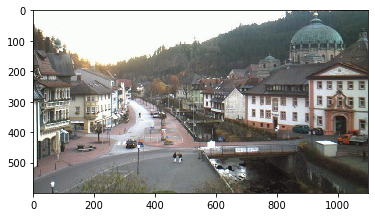

In [12]:
#visualize the standalized image
image_num = 0
selected_image = STANDALIZED_LIST[image_num][0]
selected_label = STANDALIZED_LIST[image_num][1]

plt.imshow(selected_image)
print("Shape: ", selected_image.shape)
print("Label(1=day, 0-night): "+str(selected_label))


In [26]:
#feature extraction
#find the average brightness
def avg_brightness(rgb_image):
    #convert into hsv
    hsv = cv2.cvtColor(rgb_image, cv2.COLOR_RGB2HSV)
    
    #add up all the pixel values in V channel
    sum_brightness = np.sum(hsv[:,:,2])
    area = 600 * 1100.0
    
    #fing the average
    avg = sum_brightness / area
    
    return avg

Avg brightness: 99.53270606060606


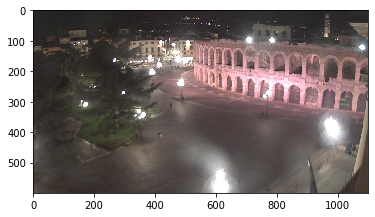

In [27]:
#testing average brightness level
image_num = 200
test_im = STANDALIZED_LIST[image_num][0]

avg = avg_brightness(test_im)
print("Avg brightness: "+str(avg))
plt.imshow(test_im)

In [32]:
#build complete classifier
def estimate_label(rgb_image):
    avg = avg_brightness(rgb_image)
    # Use the avg brightness feature to predict a label (0, 1)
    predicted_label = 0 # 0=night
    threshold = 100
    if (avg > threshold):
        predicted_label = 1
    return predicted_label


In [33]:
import random

TEST_LIST = helpers.load_dataset(image_dir_test)

STANDALIZED_TEST_LIST = helpers.standardize(TEST_LIST)

#shuffle the standalized test data
random.shuffle(STANDALIZED_TEST_LIST)

Avg brightness: 104.16067575757576
Label:  1


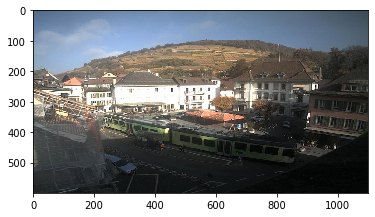

In [34]:
#testing average brightness level
image_num = 100
test_im = STANDALIZED_TEST_LIST[image_num][0]

label = estimate_label(test_im)
avg = avg_brightness(test_im)
print("Avg brightness: "+str(avg))
print("Label: ", label)
plt.imshow(test_im)